# Linear Regression: Advanced
***Part [2/2]***

---

### Objectives
- Review **building a model** (with only numerical data) in StatsModels.
    - Model Summary
    - Interpreting coefficients


- Evaluating **Model Performance.** *(Beyond $R^2$)*


- Encoding **categorical variables.**


- Checking **assumptions of Linear Regression.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../data/advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
# Split into X and y.
y = df['sales']
X = df.drop('sales', axis=1)

X.shape, y.shape

((200, 3), (200,))

In [5]:
# df[['sales']].values

In [6]:
# y.values

In [7]:
# X.values

## Review: Building a basic model.

In [8]:
# Build model.
model = sm.OLS(y, X).fit()
model

In [9]:
# Check summary.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                   2.43e-171
Time:                        15:31:53   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print('Before transformation:', X.shape)
X = sm.add_constant(X)
print('After transformation:', X.shape)

Before transformation: (200, 3)
After transformation: (200, 4)


In [11]:
X.head()

,const,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


In [12]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        15:31:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
if 'newspaper' in X.columns:
    X.drop('newspaper', axis=1, inplace=True)

In [14]:
X

,const,TV,radio
1,1.0,230.1,37.8
2,1.0,44.5,39.3
3,1.0,17.2,45.9
4,1.0,151.5,41.3
5,1.0,180.8,10.8
...,...,...,...
196,1.0,38.2,3.7
197,1.0,94.2,4.9
198,1.0,177.0,9.3
199,1.0,283.6,42.0


In [15]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           4.83e-98
Time:                        15:31:53   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluating performance.

In [16]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [17]:
# Get predictions.
y_pred = model.predict(X)
y_pred.head()

1    20.555465
2    12.345362
3    12.337018
4    17.617116
5    13.223908
dtype: float64

In [18]:
# MAE - Mean Absolute Error
mean_absolute_error(y, y_pred)

1.2537471644234015

In [19]:
# MSE - Mean Squared Error
mean_squared_error(y, y_pred)

2.784569900338092

In [20]:
# RMSE - Root Mean Squared Error
np.sqrt(mean_squared_error(y, y_pred))

1.668703059366193

## Processing: Categorical Variables & Scaling.

In [21]:
# Load mpg dataset.
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [22]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [23]:
df['cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [25]:
# Drop na.
df.dropna(inplace=True)
# df.info()

# Set X, y.
y = df['mpg']
X = df.drop(columns=['mpg', 'name'])
X.shape, y.shape

((392, 7), (392,))

In [26]:
# Use get_dummies() for categorical variables.
ohe_cols = pd.get_dummies(X['origin'], drop_first=True)
ohe_cols.head()

,japan,usa
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
# Concatinate X to include OHE'd variables.
X_processed = pd.concat(
    [X.drop('origin', axis=1), ohe_cols], 
    axis=1
    )
X_processed.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,japan,usa
0,8,307.0,130.0,3504,12.0,70,0,1
1,8,350.0,165.0,3693,11.5,70,0,1
2,8,318.0,150.0,3436,11.0,70,0,1
3,8,304.0,150.0,3433,12.0,70,0,1
4,8,302.0,140.0,3449,10.5,70,0,1


In [28]:
X_processed = sm.add_constant(X_processed)
X_processed.head()

,const,cylinders,displacement,horsepower,weight,acceleration,model_year,japan,usa
0,1.0,8,307.0,130.0,3504,12.0,70,0,1
1,1.0,8,350.0,165.0,3693,11.5,70,0,1
2,1.0,8,318.0,150.0,3436,11.0,70,0,1
3,1.0,8,304.0,150.0,3433,12.0,70,0,1
4,1.0,8,302.0,140.0,3449,10.5,70,0,1


## Remodeling: Include All Predictors


In [29]:
# Build model on mpg.
model = sm.OLS(y, X_processed).fit()

In [30]:
# Check summary.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Mon, 25 Jul 2022   Prob (F-statistic):          1.79e-139
Time:                        15:31:53   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.3246      4.602     -3.330      0.001     -24.374      -6.276
cylinders       -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement     0.0240      0.008      3.133      0.002       0.009       0.039
horsepower      -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight          -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration     0.0791      0.098      0.805      0.421      -0.114       0.272
model_year       0.7770      0.052     15.005      0.000       0.675       0.879
japan            0.2232      0.566      0.394      0.694      -0.890       1.336
usa             -2.6300      0.566     -4.643      0.000      -3.744      -1.516
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpreting coefficients.

## Checking for Assumptions

### 1. Linearity

**The relationship between the target and predictor is linear.** Check this by drawing a scatter plot of your predictor and your target, and see if there is evidence that the relationship might not follow a straight line OR look at the correlation coefficient.

**What can I do if it looks like I'm violating this assumption?**

- Consider log-scaling your data.
- Consider a different type of model!

### 2. Normality
The normality assumption states that the model _residuals_ should follow a normal distribution.
**Note**: the normality assumption talks about the model residuals and not about the distributions of the variables!

**How can I check for this?**
* Check the Omnibus value (This is a test for error normality. The probability is the chance that the errors are normally distributed.)
    - Normal Test *https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html*
* Build a QQ-Plot.

**What can I do if it looks like I'm violating this assumption?**
* Drop outliers 
* Consider log-scaling your data 

***Demo: Sample Residual Distributions and their QQ-plots.***

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/inhouse_qq_plots.png' width=700/>

---

```python
# Demo of `qqplot` code.
fig = sm.graphics.qqplot(residuals, line='45', fit=True);
```

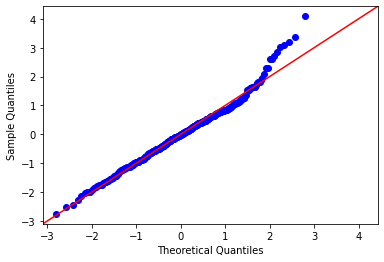

In [31]:
fig = sm.graphics.qqplot(model.resid, line='45', fit=True);

### 3. Homoskedasticity

The errors should be homoskedastic. That is, the errors have the same variance.

Basically if the residuals are evenly spread through range

<img src='https://github.com/learn-co-students/dsc-01-10-11-regression-assumptions-online-ds-ft-031119/raw/master/images/homo_2.png' width=700/>

The residual errors have the same variance.

**How can I check for this?**

* Check the Durbin-Watson score (This is a test for error homoskedasticity. We're looking for values between ~1.5 and ~2.5).
    - Documentation: *https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html*
    - Demonstration: *https://www.statology.org/durbin-watson-test-python/*
* Build an error plot, i.e. a plot of errors for a particular predictor (vs. the values of that predictor).

**What can I do if it looks like I'm violating this assumption?**

* Consider dropping extreme values.
* Consider log-scaling your target.
* Consider a different type of model!

```python
# Demo of Homoskedasticity
plt.scatter(x=fitted.fittedvalues,y=fitted.resid)
```

### 4. Multicollinearity

The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Multicollinearity occurs when 2 or more of the independent variables are highly correlated with each other.

**How can I check for this?**
1. Use `variance_inflation_factor()`
2. Look at a scatter matrix 
3. Look at a heatmap 

**What can I do if it looks like I'm violating this assumption?**
- Remove features that are highly collinear with each other.

#### Important: Note on *VIF*
> *The variance inflation factor is a measure for the increase of the
variance of the parameter estimates if an additional variable, given by
exog_idx is added to the linear regression. It is a measure for
multicollinearity of the design matrix, exog.*
>
> ***One recommendation is that if VIF is greater than 5, then the explanatory
variable given by exog_idx is highly collinear with the other explanatory
variables***, *and the parameter estimates will have large standard errors
because of this.*


***Important***
- **When using VIF, you must include an intercept (constant column) for the results of this test to be accurate.**

In [32]:
# Writing a function to create VIF dictionary.
def create_vif_dictionary(X):
    """
    Parameters
    ----------
    X: Pandas dataframe of predictive variables only.
        Should have `.columns` and `.values` attributes.
    """
    
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(X.columns)):
        # Calculate VIF
        vif = variance_inflation_factor(X.values, i)
        
        # Extract column name for dictionary key.
        v = X.columns[i]
        
        # Set value in dictionary.
        vif_dct[v] = vif

    return vif_dct

In [33]:
X_processed

,const,cylinders,displacement,horsepower,weight,acceleration,model_year,japan,usa
0,1.0,8,307.0,130.0,3504,12.0,70,0,1
1,1.0,8,350.0,165.0,3693,11.5,70,0,1
2,1.0,8,318.0,150.0,3436,11.0,70,0,1
3,1.0,8,304.0,150.0,3433,12.0,70,0,1
4,1.0,8,302.0,140.0,3449,10.5,70,0,1
...,...,...,...,...,...,...,...,...,...
393,1.0,4,140.0,86.0,2790,15.6,82,0,1
394,1.0,4,97.0,52.0,2130,24.6,82,0,0
395,1.0,4,135.0,84.0,2295,11.6,82,0,1
396,1.0,4,120.0,79.0,2625,18.6,82,0,1


In [34]:
pd.DataFrame(create_vif_dictionary(X_processed), index=[0]).T

,0
const,759.457536
cylinders,10.737771
displacement,22.937950
horsepower,9.957265
weight,11.074349
acceleration,2.625906
model_year,1.301373
japan,1.848795
usa,2.696010


<AxesSubplot:xlabel='displacement', ylabel='weight'>

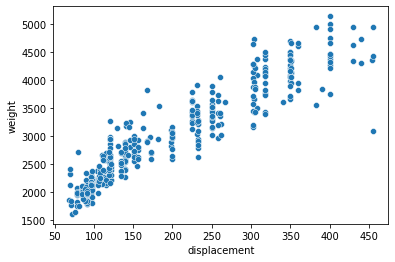

In [35]:
sns.scatterplot(x='displacement', y='weight', data=X_processed)